In [21]:
from gensim.models import Word2Vec
 
from nltk.cluster import KMeansClusterer
import nltk
 
 
from sklearn import cluster
from sklearn import metrics
 
# training data
 
sentences = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['this', 'is', 'the', 'new', 'post'],
          ['this', 'is', 'about', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'last', 'post']]
 
 
# training model
model = Word2Vec(sentences, min_count=1)
 
# get vector data
X = model[model.wv.vocab]
print (X)
 
print (model.similarity('this', 'is'))
 
print (model.similarity('post', 'book'))
 
print (model.most_similar(positive=['machine'], negative=[], topn=2))
 
print (model['the'])
 
print (list(model.wv.vocab))
 
print (len(list(model.wv.vocab)))
 
 
 
 
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
 
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))
 
 
 
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

[[-0.00056412 -0.00025603  0.00464624 ...  0.0004787   0.00331908
   0.00438698]
 [ 0.00415156 -0.00310682  0.00197991 ... -0.00203015 -0.00283253
  -0.0007974 ]
 [-0.0028635   0.00371423 -0.00307453 ...  0.0045054   0.00406686
  -0.00159311]
 ...
 [-0.00377117 -0.00441405  0.00483241 ... -0.0006942   0.00426076
  -0.00365577]
 [-0.0018705   0.00156948  0.00396802 ... -0.00362358 -0.00036365
  -0.00288098]
 [-0.00342796 -0.00395825  0.0011236  ...  0.0003461  -0.00332199
   0.00156874]]
-0.027099743
0.0014363974
[('is', 0.1208348497748375), ('good', 0.044497162103652954)]
[-0.0028635   0.00371423 -0.00307453 -0.00116226  0.00490216  0.00158267
 -0.00218632  0.00288888 -0.00040363 -0.00119299 -0.00324621 -0.00310095
 -0.00082714 -0.00440595  0.00342361  0.00346344  0.00233476  0.00477411
  0.00248636  0.00252665  0.00244908  0.0008371   0.00353294  0.00488874
 -0.00041913  0.00008197 -0.00466198  0.00294717  0.00149914 -0.00220942
  0.00027275 -0.00078677 -0.0028294   0.00483769 -0.0031

C:\Users\shanw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\shanw\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
C:\Users\shanw\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
C:\Users\shanw\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
C:\Users\shanw\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [22]:
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics

In [23]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  


C:\Users\shanw\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
C:\Users\shanw\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
C:\Users\shanw\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
C:\Users\shanw\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
C:\Users\shanw\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_si

[array([ 0.00063632, -0.00028898, -0.00066328,  0.00082079,  0.00064292,
        0.00007728, -0.00065626, -0.00029872, -0.00087485,  0.00038928,
        0.00048842,  0.00005654,  0.00120425,  0.00108508,  0.0001224 ,
        0.00028445, -0.00124841, -0.00131198,  0.00105104,  0.00050888,
        0.00075985, -0.00098165,  0.00235884,  0.00160869, -0.00031162,
        0.00057624, -0.00153292,  0.00019194, -0.0002467 , -0.00140208,
       -0.00049795, -0.00211312,  0.00076092,  0.00068784, -0.00120909,
        0.00112731,  0.00139689,  0.00054325, -0.00164022,  0.00132884,
        0.00053872, -0.00184556, -0.00030196, -0.0012558 , -0.00042428,
        0.00119577, -0.00189123, -0.00014251,  0.00085869, -0.00218488,
       -0.00047219,  0.00217514, -0.00039428,  0.000413  ,  0.00073529,
        0.00012879, -0.00151336,  0.00083533,  0.00152257, -0.00087435,
       -0.00110826,  0.00134576,  0.00138537,  0.00101544,  0.00126779,
       -0.00152297, -0.00092289,  0.00091385,  0.00084479,  0.0

-0.00029627508613443913
Silhouette_score: 
0.3153855
0 ['this', 'is', 'the', 'good', 'machine', 'learning', 'book']
1 ['this', 'is', 'another', 'book']
1 ['one', 'more', 'book']
0 ['this', 'is', 'the', 'new', 'post']
0 ['this', 'is', 'about', 'machine', 'learning', 'post']
0 ['and', 'this', 'is', 'the', 'last', 'post']


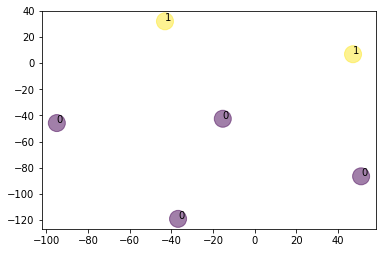

In [24]:
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))   
 
print ("========================")
print (X)
 
 
  
 
# note with some version you would need use this (without wv) 
#  model[model.vocab] 
print (model[model.wv.vocab])
 
 
  
 
print (model.similarity('post', 'book'))
print (model.most_similar(positive=['machine'], negative=[], topn=2))
  
  
 
  
  
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
  
  
  
for index, sentence in enumerate(sentences):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))
 
     
     
     
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
print(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)
 
 
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
 
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
 
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  sentences[j]))
 
 
plt.show()

In [29]:
len(X[3])

100